In [ ]:
import requests
import os
import json

import numpy as np
import pandas as pd

import altair as alt
alt.data_transformers.disable_max_rows()

import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import boxcox

# Modeling and machine learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    learning_curve,
    ShuffleSplit
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle

## 1. Call the API and store in JSON file

In [ ]:
# # Define the list of major cities in Massachusetts with their coordinates
# cities = {
#     "Boston": {"lat": "42.3601", "lon": "-71.0589"},
#     "Worcester": {"lat": "42.2626", "lon": "-71.8023"},
#     "Springfield": {"lat": "42.1015", "lon": "-72.5898"},
#     "Lowell": {"lat": "42.6334", "lon": "-71.3162"},
#     "Cambridge": {"lat": "42.3736", "lon": "-71.1097"},
#     "Brockton": {"lat": "42.0834", "lon": "-71.0184"},
#     "New Bedford": {"lat": "41.6362", "lon": "-70.9342"},
#     "Fall River": {"lat": "41.7015", "lon": "-71.1550"},
#     "Plymouth": {"lat": "41.9584", "lon": "-70.6673"},
#     "Lynn": {"lat": "42.4668", "lon": "-70.9495"},
#     "Quincy": {"lat": "42.2529", "lon": "-71.0023"},
#     "Newton": {"lat": "42.3370", "lon": "-71.2092"},
#     "Somerville": {"lat": "42.3876", "lon": "-71.0995"},
#     "Lawrence": {"lat": "42.7070", "lon": "-71.1603"},
#     "Framingham": {"lat": "42.2793", "lon": "-71.4162"}
# }

# url = "https://air-quality.p.rapidapi.com/history/airquality"
# headers = {
#     "x-rapidapi-key": "43f7651c54msha1845c116e7f838p1749f8jsn7f31d2420dff",
#     "x-rapidapi-host": "air-quality.p.rapidapi.com"
# }

# filename = "MA_major_cities_air_quality.json"

# # Load existing data if file exists
# if os.path.exists(filename):
#     with open(filename, "r", encoding="utf-8") as f:
#         all_cities_data = json.load(f)
# else:
#     all_cities_data = {}

# # Retrieve data for each city
# for city, coords in cities.items():
#     querystring = {"lat": coords["lat"], "lon": coords["lon"]}
#     response = requests.get(url, headers=headers, params=querystring)
#     if response.status_code == 200:
#         new_data = response.json()
#         if city in all_cities_data:
#             # Combine new data with existing data
#             combined = all_cities_data[city]["data"] + new_data["data"]
#             # Use a dictionary to remove duplicates based on timestamp_utc
#             unique = {}
#             for record in combined:
#                 unique[record["timestamp_utc"]] = record
#             all_cities_data[city]["data"] = list(unique.values())
#         else:
#             all_cities_data[city] = new_data
#         print(f"{city} data download succeed")
#     else:
#         print(f"{city} data download failed, error code: {response.status_code}")

# # Save the combined data to a JSON file
# with open(filename, "w", encoding="utf-8") as f:
#     json.dump(all_cities_data, f, indent=4, ensure_ascii=False)

# print("All cities data saved to: ", filename)

Boston data download succeed
Worcester data download succeed
Springfield data download succeed
Lowell data download succeed
Cambridge data download succeed
Brockton data download succeed
New Bedford data download succeed
Fall River data download succeed
Plymouth data download succeed
Lynn data download succeed
Quincy data download succeed
Newton data download succeed
Somerville data download succeed
Lawrence data download succeed
Framingham data download succeed
All cities data saved to:  MA_major_cities_air_quality.json


## 2. Data Cleaning

In [ ]:
# Load JSON file into a DataFrame
with open("MA_major_cities_air_quality.json", "r", encoding="utf-8") as f:
    all_cities = json.load(f)

# Combine data from all cities into a single DataFrame
# Add a new column 'city' to identify the city for each record
df_all = pd.concat(
    [pd.DataFrame(info["data"]).assign(city=city) for city, info in all_cities.items()],
    ignore_index=True
)

df_all.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts,city
0,39,60.1,2025-03-06:03,3.0,84.3,6.0,5.00,2.0,2025-03-05T22:00:00,2025-03-06T03:00:00,1741230000,Boston
1,28,121.0,2025-03-06:02,34.0,60.8,9.5,5.00,1.0,2025-03-05T21:00:00,2025-03-06T02:00:00,1741226400,Boston
2,28,121.0,2025-03-06:01,23.0,61.2,6.0,5.00,1.0,2025-03-05T20:00:00,2025-03-06T01:00:00,1741222800,Boston
3,28,232.0,2025-03-06:00,31.5,61.4,11.7,5.33,1.0,2025-03-05T19:00:00,2025-03-06T00:00:00,1741219200,Boston
4,21,121.0,2025-03-05:23,42.0,37.2,17.0,5.00,1.0,2025-03-05T18:00:00,2025-03-05T23:00:00,1741215600,Boston


In [48]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              2520 non-null   int64  
 1   co               2520 non-null   float64
 2   datetime         2520 non-null   object 
 3   no2              2520 non-null   float64
 4   o3               2520 non-null   float64
 5   pm10             2520 non-null   float64
 6   pm25             2520 non-null   float64
 7   so2              2520 non-null   float64
 8   timestamp_local  2520 non-null   object 
 9   timestamp_utc    2520 non-null   object 
 10  ts               2520 non-null   int64  
 11  city             2520 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 236.4+ KB


In [49]:
# Check missing values
df_all.isna().sum()

aqi                0
co                 0
datetime           0
no2                0
o3                 0
pm10               0
pm25               0
so2                0
timestamp_local    0
timestamp_utc      0
ts                 0
city               0
dtype: int64

In [50]:
# Check for outlier with IQR
air_cols = ['aqi','pm25','pm10','o3','co','so2','no2']

for col in air_cols:
    Q1 = df_all[col].quantile(0.25)
    Q3 = df_all[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    mask_outliers = (df_all[col] < lower_bound) | (df_all[col] > upper_bound)
    outliers = df_all[mask_outliers]
    
    print(f"{col} - lower_bound: {lower_bound:.2f}, upper_bound: {upper_bound:.2f}")
    print(f"{col} - Number of outlier: {len(outliers)}")


aqi - lower_bound: -7.00, upper_bound: 65.00
aqi - Number of outlier: 6
pm25 - lower_bound: -4.50, upper_bound: 12.82
pm25 - Number of outlier: 50
pm10 - lower_bound: -5.00, upper_bound: 19.00
pm10 - Number of outlier: 106
o3 - lower_bound: -18.86, upper_bound: 133.04
o3 - Number of outlier: 0
co - lower_bound: 0.94, upper_bound: 193.04
co - Number of outlier: 571
so2 - lower_bound: -2.00, upper_bound: 6.00
so2 - Number of outlier: 282
no2 - lower_bound: -27.63, upper_bound: 59.78
no2 - Number of outlier: 243


In [51]:
# Check for outlier with boxplot
df_long = df_all.melt(id_vars=["city", "timestamp_local"], value_vars=air_cols,
                      var_name="Variables", value_name="Value")

# Boxplot
air_boxplot = alt.Chart(df_long).mark_boxplot(extent=1.5).encode(
    x=alt.X('Variables:N', title='Variables', sort=air_cols),
    y=alt.Y('Value:Q', title='Value'),
    color=alt.Color('Variables:N', legend=None),
    tooltip=["Variables", "Value"]
).properties(
    width=600,
    height=300,
    title="Boxplot of Air Quality Data by Pollutant Variables"
)

air_boxplot


alt.Chart(...)

In [52]:
# Visualize the data using Altair
df_all['timestamp_local'] = pd.to_datetime(df_all['timestamp_local'])

air_charts = []
for vars in air_cols:
    chart = alt.Chart(df_all).mark_line(point=True).encode(
        x=alt.X('timestamp_local:T', title='Time'),
        y=alt.Y(f'{vars}:Q', title=vars.upper()),
        color=alt.Color('city:N', title='City'),
        tooltip=['city', 'timestamp_local:T', vars]
    ).properties(
        width=1000,
        height=150,
        title=f'{vars.upper()} Trend of Major Cities in Massachusetts'
    )
    air_charts.append(chart)

air_chart_combined = alt.vconcat(*air_charts).resolve_scale(y='independent')
air_chart_combined


alt.VConcatChart(...)

 Summary of Outliers:

1. Outlier Distribution Characteristics:
CO, NO₂, SO₂: A large number of high values fall above the IQR upper bound, indicating a clear long-tail distribution (CO: 500+ records; NO₂ and SO₂: 200+ each).
PM₂.₅, PM₁₀: Some high values exist, but fewer in comparison.
O₃: No outliers detected, suggesting a more concentrated distribution.

2. Reasons for High Number of Outliers:
High values may represent real pollution spikes, caused by episodic emissions from traffic or industrial sources, rather than data errors.

3. Transformation:
Apply log or Box-Cox transformations to long-tailed variables like CO and NO₂ to smooth distributions and improve model performance.
Further Visualization: Use QQ-plots to compare data distributions before and after transformation, assessing improvements in normality.

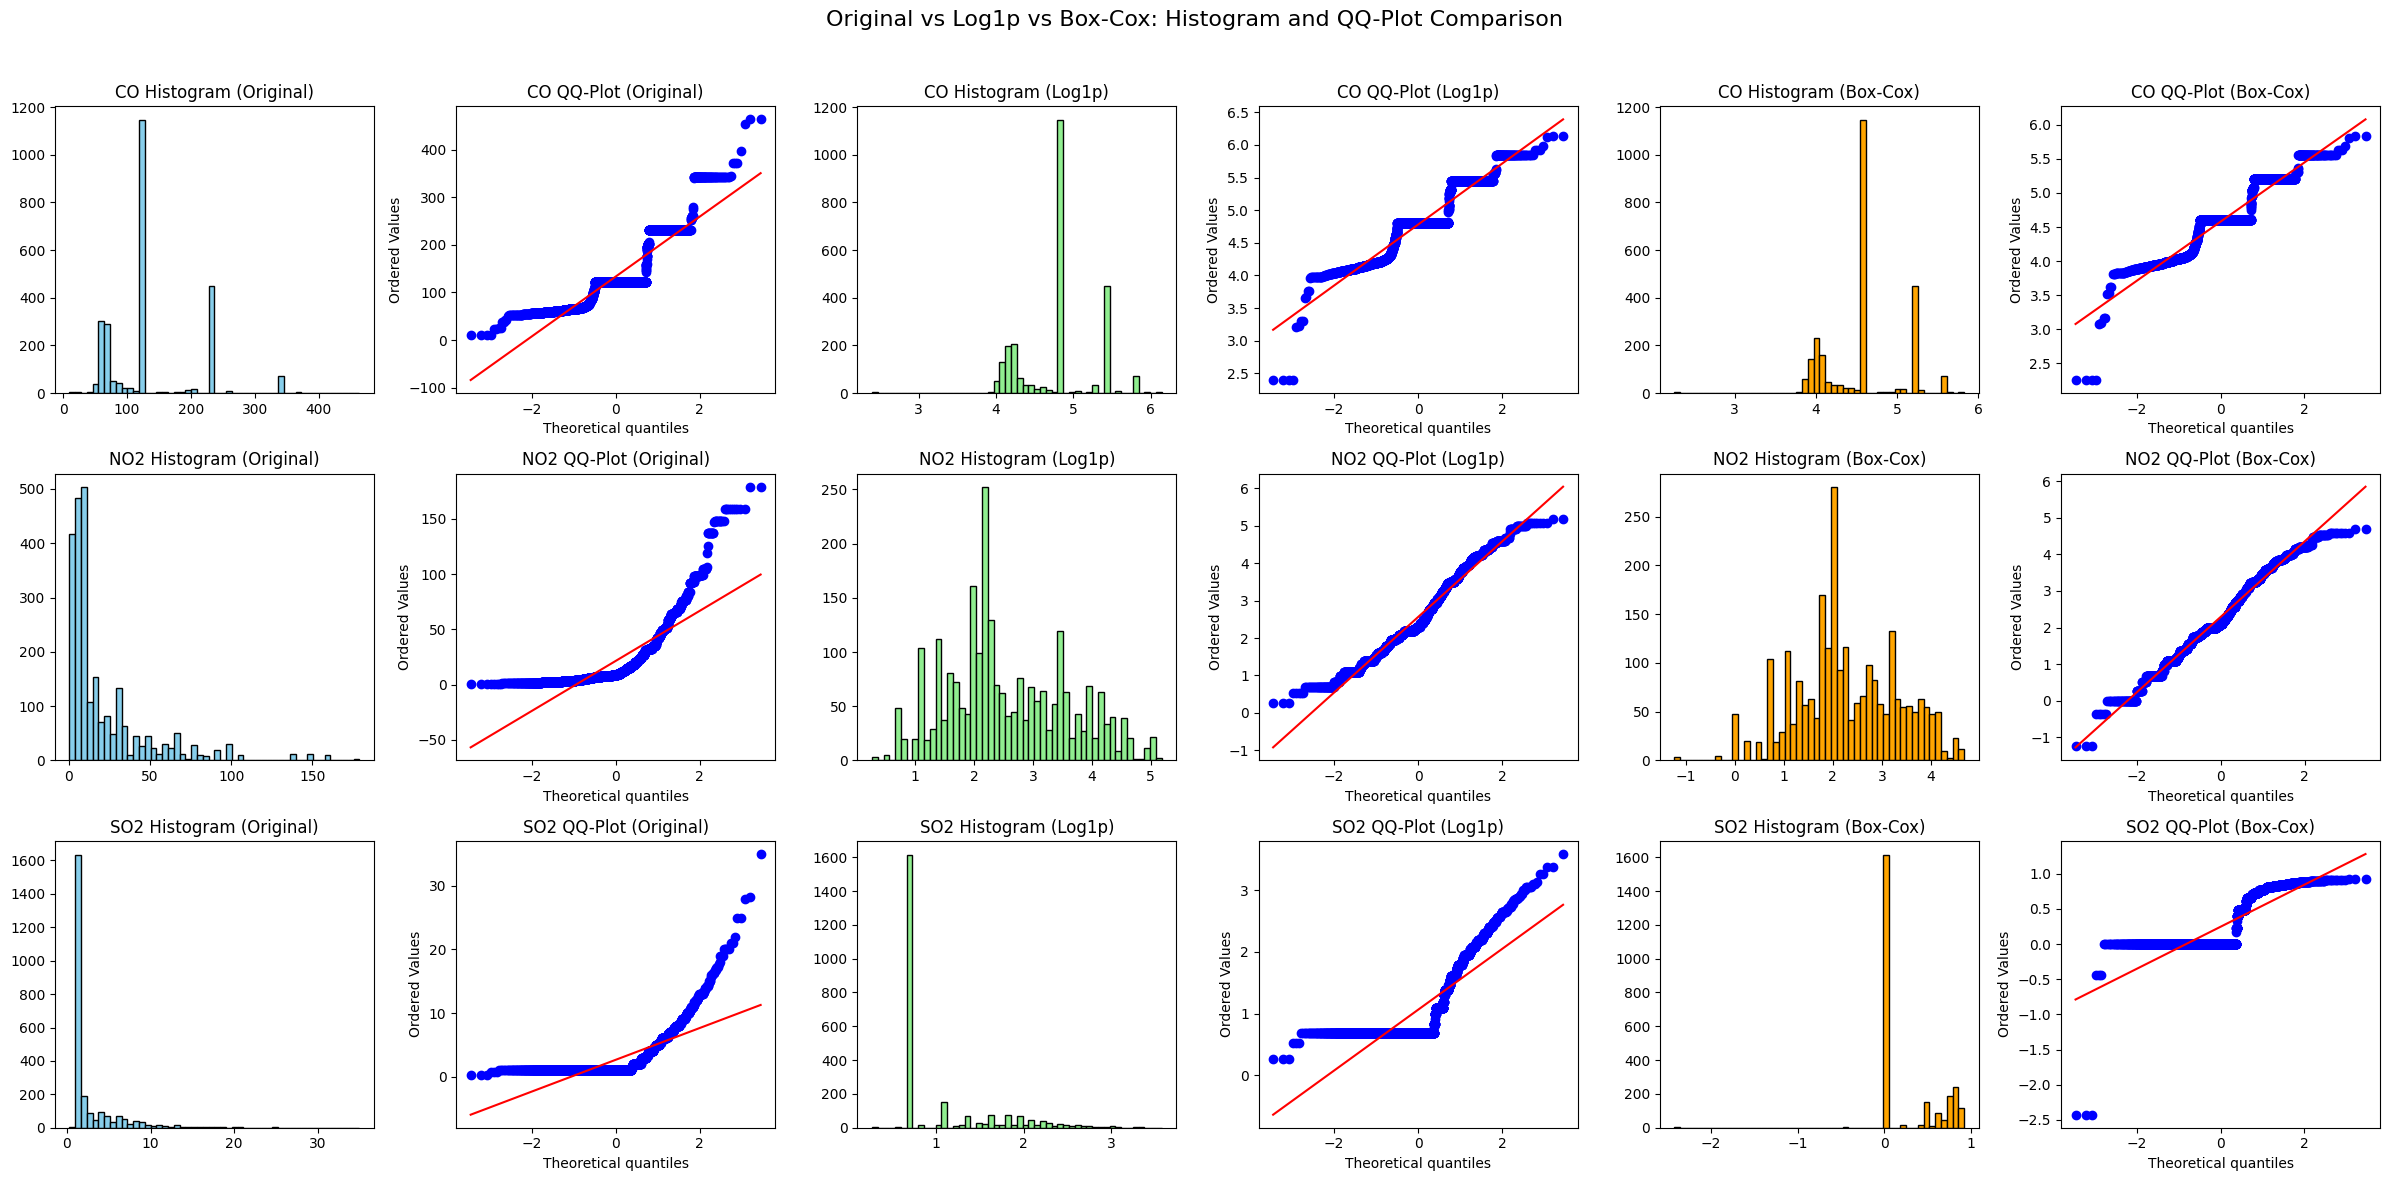

In [ ]:
# Plot QQ-Plot and Histogram for long-tailed variables (Original vs Log1p vs Box-Cox)
long_tailed_vars = ["co", "no2", "so2"]

# Hist + QQ for Original vs Log1p vs Box-Cox
fig, axes = plt.subplots(len(long_tailed_vars), 6, figsize=(24, 12))
fig.suptitle("Original vs Log1p vs Box-Cox: Histogram and QQ-Plot Comparison", fontsize=16)

for i, var in enumerate(long_tailed_vars):
    # get positive values for Box-Cox transformation
    data = pd.to_numeric(df_all[var], errors='coerce').dropna()
    data = data[data > 0]

    # log1p and Box-Cox transformations
    log_data = np.log1p(data)
    boxcox_data, _ = stats.boxcox(data)

    # Histogram - Origianl
    axes[i, 0].hist(data, bins=50, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f"{var.upper()} Histogram (Original)")

    # QQ-Plot - Origianl
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"{var.upper()} QQ-Plot (Original)")

    # Histogram - Log1p
    axes[i, 2].hist(log_data, bins=50, color='lightgreen', edgecolor='black')
    axes[i, 2].set_title(f"{var.upper()} Histogram (Log1p)")

    # QQ-Plot - Log1p
    stats.probplot(log_data, dist="norm", plot=axes[i, 3])
    axes[i, 3].set_title(f"{var.upper()} QQ-Plot (Log1p)")

    # Histogram - Box-Cox
    axes[i, 4].hist(boxcox_data, bins=50, color='orange', edgecolor='black')
    axes[i, 4].set_title(f"{var.upper()} Histogram (Box-Cox)")

    # QQ-Plot - Box-Cox
    stats.probplot(boxcox_data, dist="norm", plot=axes[i, 5])
    axes[i, 5].set_title(f"{var.upper()} QQ-Plot (Box-Cox)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Summary of Transformation:
1. CO:
     - Box-Cox: Histogram is more symmetrical; QQ-Plot closely aligns with the straight line.
     - Log1p: Significant improvement, but heavy tail still deviates.

    Result: Box-Cox	is more effective in reducing long tail; QQ-Plot is nearly linear.

2. NO₂:
     - Box-Cox: QQ-Plot is straighter; distribution approximates normality.
     - Log1p: Some improvement, but slightly weaker than Box-Cox.

    Result: Box-Cox performs better than Log1p, especially in handling the tail.

3. SO₂:
     - Box-Cox: Greatly reduces the long tail; distribution is more concentrated.
     - Log1p: Less effective; tail deviation remains.
     
    Result: Box-Cox results in a more normal-like distribution.

In [63]:
# Apply box-Cox Transformation for long-tailed variables
df_transformed = df_all.copy()

for var in long_tailed_vars:
     # get positive values for Box-Cox transformation
    data = pd.to_numeric(df_transformed[var], errors='coerce')
    data_pos = data.copy()
    data_pos[data_pos <= 0] = np.nan

    transformed = np.full_like(data_pos, np.nan, dtype=np.float64)
    valid_mask = data_pos.notna()

    # Box-Cox transformation
    transformed[valid_mask] = boxcox(data_pos[valid_mask])[0]

    # Add transformed data to the DataFrame
    df_transformed[f"{var}_boxcox"] = transformed

df_transformed.head()


,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts,city,co_boxcox,no2_boxcox,so2_boxcox
0,39,60.1,2025-03-06:03,3.0,84.3,6.0,5.00,2.0,2025-03-05 22:00:00,2025-03-06T03:00:00,1741230000,Boston,3.955682,1.074687,0.491943
1,28,121.0,2025-03-06:02,34.0,60.8,9.5,5.00,1.0,2025-03-05 21:00:00,2025-03-06T02:00:00,1741226400,Boston,4.604175,3.287633,0.000000
2,28,121.0,2025-03-06:01,23.0,61.2,6.0,5.00,1.0,2025-03-05 20:00:00,2025-03-06T01:00:00,1741222800,Boston,4.604175,2.945785,0.000000
3,28,232.0,2025-03-06:00,31.5,61.4,11.7,5.33,1.0,2025-03-05 19:00:00,2025-03-06T00:00:00,1741219200,Boston,5.200478,3.221260,0.000000
4,21,121.0,2025-03-05:23,42.0,37.2,17.0,5.00,1.0,2025-03-05 18:00:00,2025-03-05T23:00:00,1741215600,Boston,4.604175,3.470215,0.000000


In [ ]:
# StandardScaler for the remain variables
scale_vars = ["aqi", "pm25", "pm10", "o3"]

df_transformed_scale = df_transformed.copy()

# StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_transformed_scale[scale_vars])

# add scaled data to the DataFrame
for i, var in enumerate(scale_vars):
    df_transformed_scale[f"{var}_scaled"] = scaled_data[:, i]

df_final = df_transformed_scale.copy()
df_final.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts,city,co_boxcox,no2_boxcox,so2_boxcox,aqi_scaled,pm25_scaled,pm10_scaled,o3_scaled
0,39,60.1,2025-03-06:03,3.0,84.3,6.0,5.00,2.0,2025-03-05 22:00:00,2025-03-06T03:00:00,1741230000,Boston,3.955682,1.074687,0.491943,0.869938,0.147032,-0.362556,1.224554
1,28,121.0,2025-03-06:02,34.0,60.8,9.5,5.00,1.0,2025-03-05 21:00:00,2025-03-06T02:00:00,1741226400,Boston,4.604175,3.287633,0.000000,-0.171283,0.147032,0.300367,0.195683
2,28,121.0,2025-03-06:01,23.0,61.2,6.0,5.00,1.0,2025-03-05 20:00:00,2025-03-06T01:00:00,1741222800,Boston,4.604175,2.945785,0.000000,-0.171283,0.147032,-0.362556,0.213196
3,28,232.0,2025-03-06:00,31.5,61.4,11.7,5.33,1.0,2025-03-05 19:00:00,2025-03-06T00:00:00,1741219200,Boston,5.200478,3.221260,0.000000,-0.171283,0.250553,0.717061,0.221953
4,21,121.0,2025-03-05:23,42.0,37.2,17.0,5.00,1.0,2025-03-05 18:00:00,2025-03-05T23:00:00,1741215600,Boston,4.604175,3.470215,0.000000,-0.833879,0.147032,1.720916,-0.837565


## 3. Data Modeling

In [77]:
# Split the data into training and testing sets
final_model_vars = [
    "co_boxcox", "no2_boxcox", "so2_boxcox",
    "aqi_scaled", "pm25_scaled", "pm10_scaled", "o3_scaled"
]
df_model = df_final[final_model_vars].dropna()

X = df_model.drop(columns=["aqi_scaled"]).values
y = df_model["aqi_scaled"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train dimension：", X_train.shape)
print("Test dimension：", X_test.shape)

Train dimension： (1988, 6)
Test dimension： (497, 6)


In [99]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0, tree_method='hist', gpu_id=-1),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}


In [ ]:
# # Define the Gridsearch parameters
# param_grids = {
#     "Ridge": {"model__alpha": [0.1, 1, 10]},
#     "Lasso": {"model__alpha": [0.01, 0.1, 1]},
#     "Random Forest": {"model__n_estimators": [100, 200], "model__max_depth": [None, 10]},
#     "Gradient Boosting": {"model__n_estimators": [100, 200], "model__max_depth": [3, 6], "model__learning_rate": [0.1, 0.3]},
#     "XGBoost": {"model__n_estimators": [100, 200], "model__max_depth": [3, 6], "model__learning_rate": [0.1, 0.3]},
#     "MLP Regressor": {"model__hidden_layer_sizes": [(50,), (100,)], "model__alpha": [0.0001, 0.001]},
#     "KNN Regressor": {"model__n_neighbors": [3, 5, 7]},
#     "SVR": {"model__C": [0.1, 1, 10], "model__kernel": ["linear", "rbf"]}
# }

In [ ]:
# # Use Pipeline & GridSearchCV to train and evaluate models
# results = {}
# best_models = {}

# for name, model in models.items():
#     print(f"Training {name}...")
    
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('model', model)
#     ])

#     param_grid = param_grids.get(name, {})
    
#     grid = GridSearchCV(
#         pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
#     )
    
#     grid.fit(X_train, y_train)
#     y_pred = grid.best_estimator_.predict(X_test)

#     results[name] = {
#         "MAE": mean_absolute_error(y_test, y_pred),
#         "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
#         "R2": r2_score(y_test, y_pred)
#     }

#     best_models[name] = grid.best_estimator_

# results_df = pd.DataFrame(results).T
# results_df.index.name = "Model"

# # Print the best parameters for each model
# for name in best_models.keys():
#     print(f"Best params for {name}: {best_models[name].get_params()}")

# # Print the results
# print("\nModel Performance on Test Set:")
# print(results_df)

Training Linear Regression...
Training Ridge...
Training Lasso...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training MLP Regressor...
Training KNN Regressor...
Training SVR...
Best params for Linear Regression: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LinearRegression())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LinearRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': None, 'model__positive': False}
Best params for Ridge: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', Ridge(alpha=10))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': Ridge(alpha=10), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__alpha': 10, 'model__copy_X': True, 'model__fit_intercept': True, 'model__max_iter': None, 'model__po

In [97]:
# Base on the result to update the parameter grid
param_grids_v2 = {
    "Ridge": {"model__alpha": [5, 10, 15, 20]},
    "Lasso": {"model__alpha": [0.005, 0.01, 0.05, 0.1]},

    "Random Forest": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [None, 6, 10, 15]
    },

    "Gradient Boosting": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [5, 6, 7],
        "model__learning_rate": [0.05, 0.1, 0.15]
    },
    
    "XGBoost": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [5, 6, 7],
        "model__learning_rate": [0.05, 0.1, 0.15]
    },

    "MLP Regressor": {
        "model__hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "model__alpha": [0.0001, 0.001, 0.01]
    },

    "KNN Regressor": {
        "model__n_neighbors": [3, 5, 7, 9]
    },

    "SVR": {
        "model__C": [1, 5, 10, 20],
        "model__kernel": ["linear", "rbf"]
    }
}


In [98]:
# Use Pipeline & GridSearchCV to train and evaluate models
results = {}
best_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    param_grid = param_grids_v2.get(name, {})
    
    grid = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

    best_models[name] = grid.best_estimator_

results_df = pd.DataFrame(results).T
results_df.index.name = "Model"

# Print the best parameters for each model
for name in best_models.keys():
    print(f"Best params for {name}: {best_models[name].get_params()}")

# Print the results
print("\nModel Performance on Test Set:")
print(results_df)

Training Linear Regression...
Training Ridge...
Training Lasso...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training MLP Regressor...
Training KNN Regressor...
Training SVR...
Best params for Linear Regression: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LinearRegression())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LinearRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': None, 'model__positive': False}
Best params for Ridge: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', Ridge(alpha=5))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': Ridge(alpha=5), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__alpha': 5, 'model__copy_X': True, 'model__fit_intercept': True, 'model__max_iter': None, 'model__posit

Model Tuning Results Ranking:

| Model              | MAE     | RMSE    | R²      |
|-------------------|---------|---------|---------|
| **Gradient Boosting** | 0.0072  | 0.0223  | 0.9995  |
| **Random Forest**     | 0.0058  | 0.0250  | 0.9994  |
| **XGBoost**           | 0.0130  | 0.0317  | 0.9990  |
| **MLP Regressor**     | 0.0390  | 0.0556  | 0.9970  |
| **SVR**               | 0.0500  | 0.0683  | 0.9955  |
| **KNN**               | 0.0550  | 0.1147  | 0.9872  |
| **Linear Models**     | 0.3223  | 0.4119  | 0.8351  |

---

Model Summary:

Gradient Boosting: delivers the highest prediction accuracy with exceptional fitting ability and the lowest error rates among all tested models.

Random Forest: provides strong performance and clear feature importance, making it both interpretable and stable.

XGBoost: slightly lower accuracy than Gradient Boosting but still performs at a very high level.


## 4. Model Performance Test

In [ ]:
# Define best models and their parameters
best_models = {
    "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "XGBoost": XGBRegressor(learning_rate=0.05, max_depth=5, n_estimators=300, tree_method='hist', gpu_id=-1, random_state=42, verbosity=0)
}

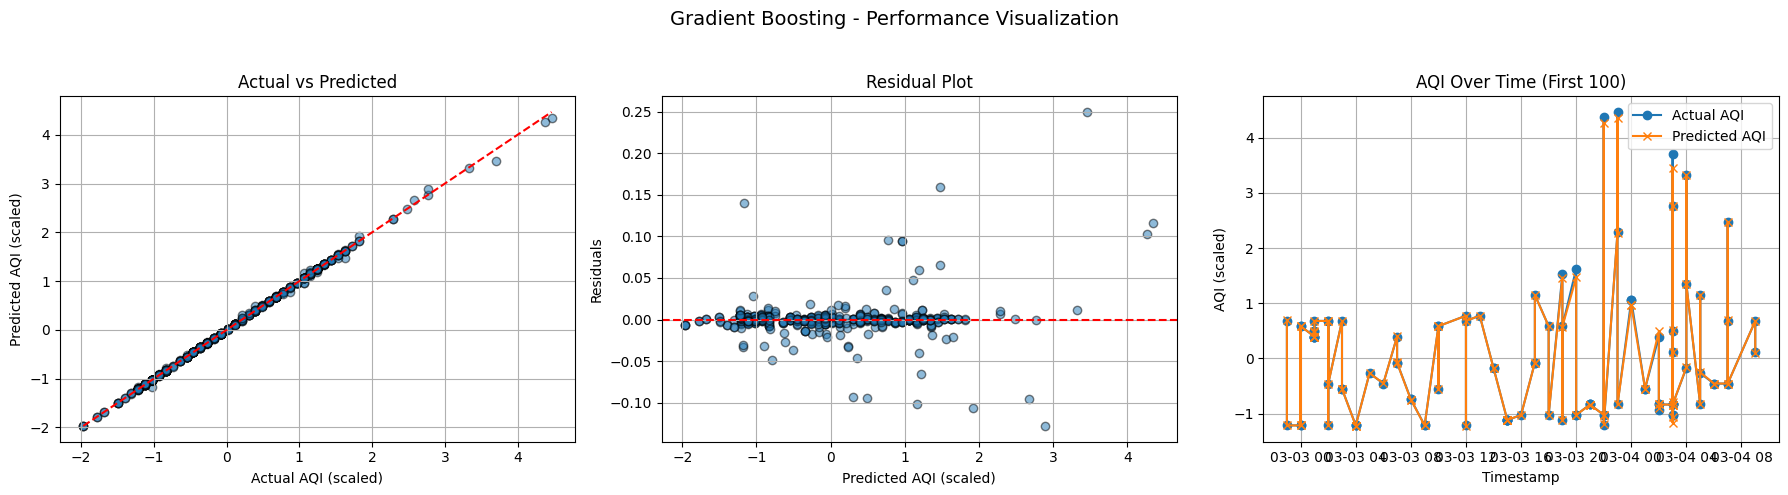

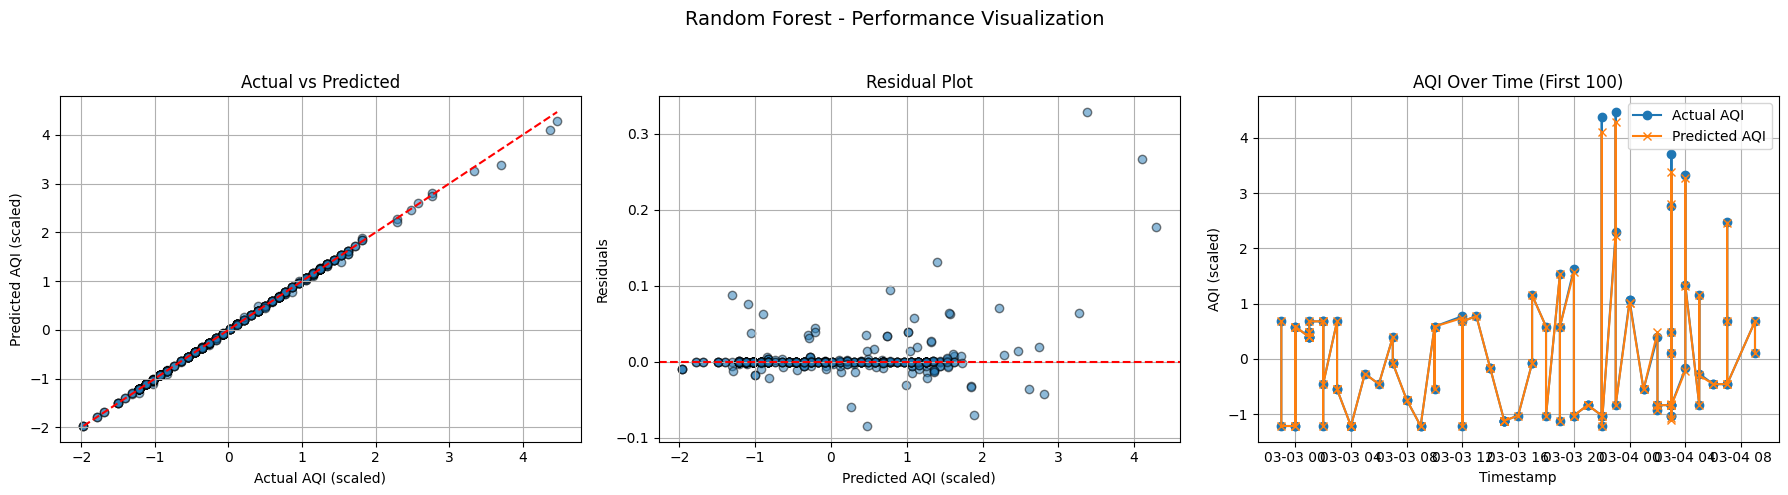

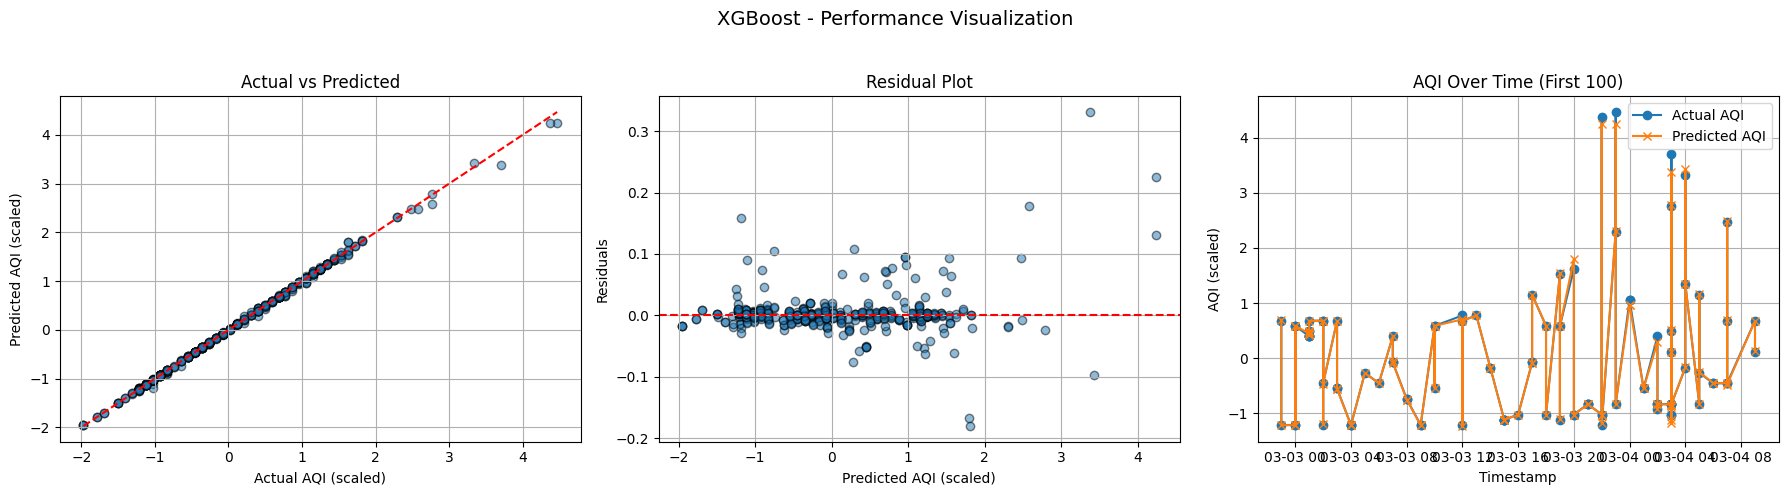

In [ ]:
df_model = df_transformed[final_model_vars + ["timestamp_local"]].dropna()
df_model.loc[:, "timestamp_local"] = pd.to_datetime(df_model["timestamp_local"])

X = df_model.drop(columns=["aqi_scaled", "timestamp_local"]).values
y = df_model["aqi_scaled"].values
timestamps = df_model["timestamp_local"].values

X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    sorted_indices = np.argsort(time_test)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"{name} - Performance Visualization", fontsize=14)

    # Actual vs Predicted
    axs[0].scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
    axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    axs[0].set_xlabel("Actual AQI (scaled)")
    axs[0].set_ylabel("Predicted AQI (scaled)")
    axs[0].set_title("Actual vs Predicted")
    axs[0].grid(True)

    # Residual Plot
    axs[1].scatter(y_pred, residuals, alpha=0.5, edgecolor='k')
    axs[1].axhline(0, color='red', linestyle='--')
    axs[1].set_xlabel("Predicted AQI (scaled)")
    axs[1].set_ylabel("Residuals")
    axs[1].set_title("Residual Plot")
    axs[1].grid(True)

    # Time Trend
    axs[2].plot(time_test[sorted_indices][:100], y_test[sorted_indices][:100], label='Actual AQI', marker='o')
    axs[2].plot(time_test[sorted_indices][:100], y_pred[sorted_indices][:100], label='Predicted AQI', marker='x')
    axs[2].set_title("AQI Over Time (First 100)")
    axs[2].set_xlabel("Timestamp")
    axs[2].set_ylabel("AQI (scaled)")
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Performance summary:

All three models demonstrate excellent predictive performance, with predicted values closely matching actual values. Residuals are centered around zero with no obvious patterns, and the models accurately capture time-based trends. These results confirm the strong fitting and temporal forecasting abilities of the models.

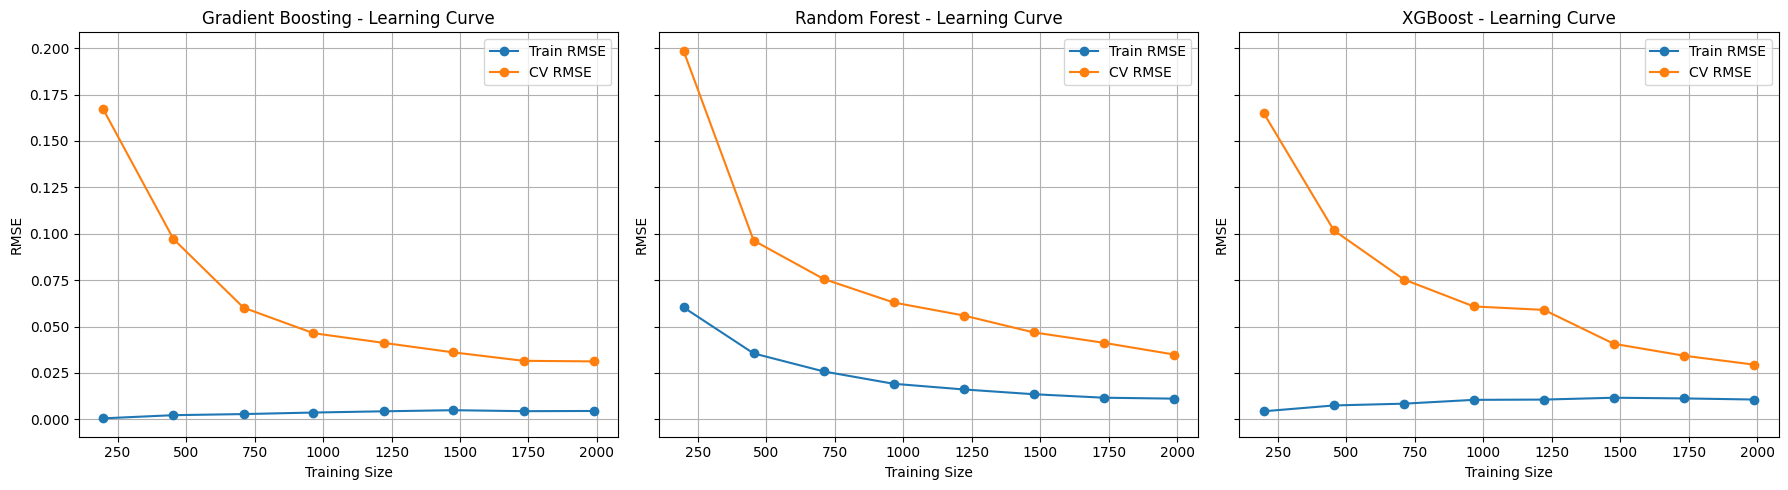

In [ ]:
# Draw learning curve to test overfitting
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Cross Validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (name, model) in zip(axes, best_models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_shuffled, y_shuffled, cv=cv,
        scoring="neg_root_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 8),
        n_jobs=-1
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', label="Train RMSE")
    ax.plot(train_sizes, test_scores_mean, 'o-', label="CV RMSE")
    ax.set_title(f"{name} - Learning Curve")
    ax.set_xlabel("Training Size")
    ax.set_ylabel("RMSE")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


Learning Curve Overfitting Test Summary: 

Gradient Boosting: Shows near-zero training error and a rapidly converging validation error (~0.03 RMSE), indicating excellent performance with no signs of overfitting.

Random Forest: Exhibits slightly higher training and validation errors (0.03–0.04 RMSE) and mild overfitting. However, it remains well-controlled and stable overall.

XGBoost: Performs similarly to Gradient Boosting, with minimal training error and strong generalization (final RMSE ~0.03), showing only a small gap between training and validation.

---
Summary:

All three models demonstrate strong generalization with consistently low validation errors. Gradient Boosting and XGBoost slightly outperform Random Forest.

## 5. Project Summary

In this project, multiple regression models were used to predict the Air Quality Index (AQI) across major cities in Massachusetts. A comprehensive evaluation was conducted based on model performance, error visualization, and learning curves.

The results indicate that the Gradient Boosting Regressor performed best among all models, demonstrating outstanding performance across key metrics:

 - Achieved the lowest RMSE (0.0223) and highest R² (0.9995) on the test set, indicating superior predictive accuracy.
 - In the actual vs. predicted scatter plot, points were densely aligned along the diagonal, reflecting excellent model fit.
 - The residual plot showed errors randomly distributed around zero, with no clear bias or heteroscedasticity, confirming strong model stability.
 - The learning curve showed fast convergence and a small gap between training and cross-validation errors, with no signs of overfitting.
 - In the time series trend comparison, the predicted curve closely followed the actual values, capturing temporal dynamics effectively.
 
In comparison, Random Forest and XGBoost also performed well, achieving R² scores of 0.9994 and 0.9990, respectively. However, they showed slightly higher validation errors and marginally less accurate trend fitting than Gradient Boosting.